In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Project/Store sales.csv'

df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
#Review data

df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


The dataset is represented by five cases (one is not informative) and 896 objects.

Removing store ID information.

In [ ]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [ ]:
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


Store_Area: Physical Area of the store in yard square.

Items_Available: Number of different items available in the corresponding store.

DailyCustomerCount: Number of customers who visited to stores on an average over month.

Store_Sales: Sales in (US $) that stores made.

In [ ]:
#Info on data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


# Exploratory Data Analysis (EDA)

In [ ]:
df.describe().style.background_gradient(cmap = "Oranges")

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


Hypothesis: There are outliers in the form of very small and very large supermarkets. But are they outliers or are they separate groups of supermarkets?

Analyzing gaps in data

In [ ]:
#Check on duplicates

df.duplicated().sum()

0

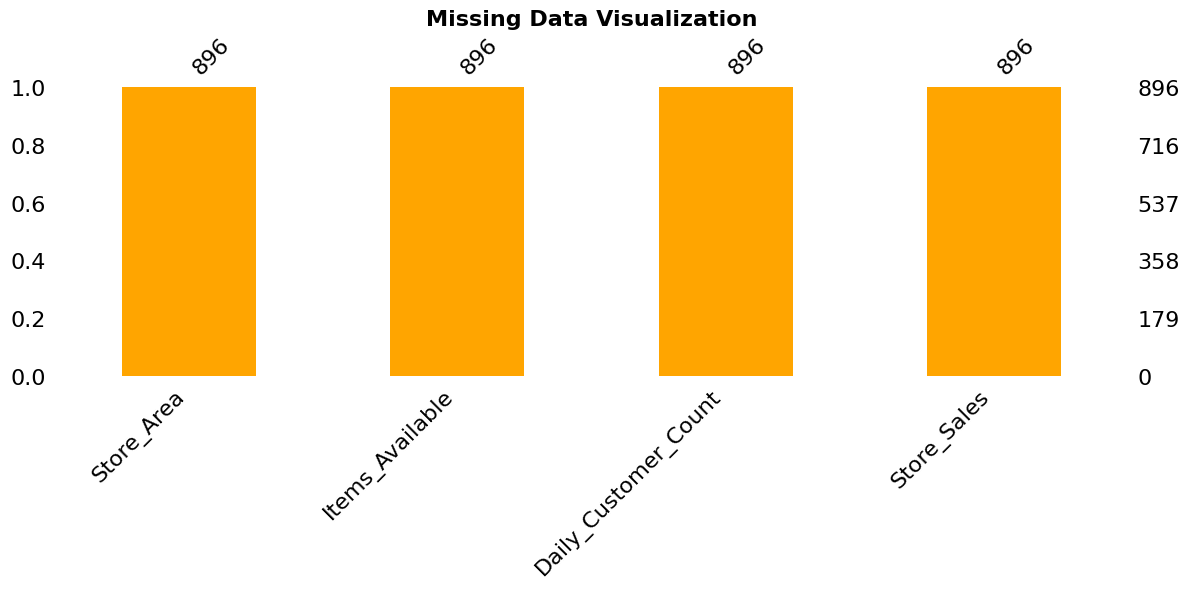

In [ ]:
#Missing value

msno.bar(df, figsize=(12, 6), color="#FFA500")
plt.title("Missing Data Visualization", fontsize=16, fontweight='bold')  # Title for the plot
plt.tight_layout()  #Adjust layout to avoid overlap

plt.show()

No missing value

Check the presence of categorical features.

In [ ]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Store_Area' has '583' unique values
Feature 'Items_Available' has '616' unique values
Feature 'Daily_Customer_Count' has '130' unique values
Feature 'Store_Sales' has '816' unique values


There are no categorical features. Let us analyze the distribution of features

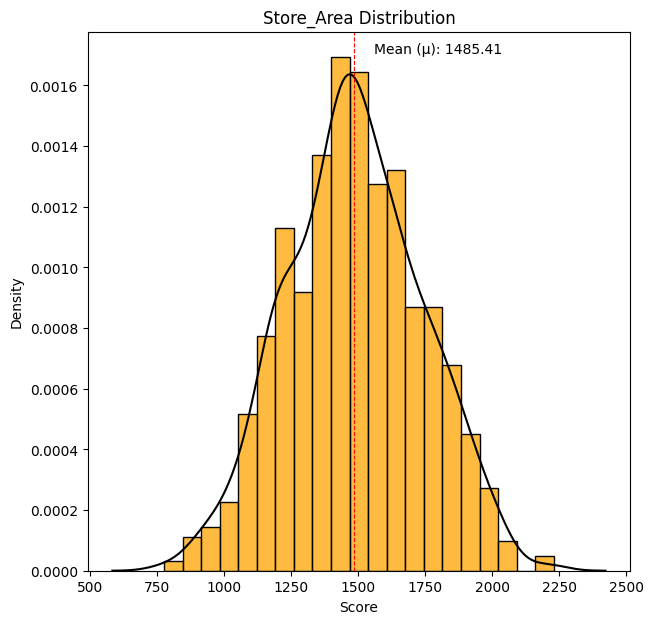

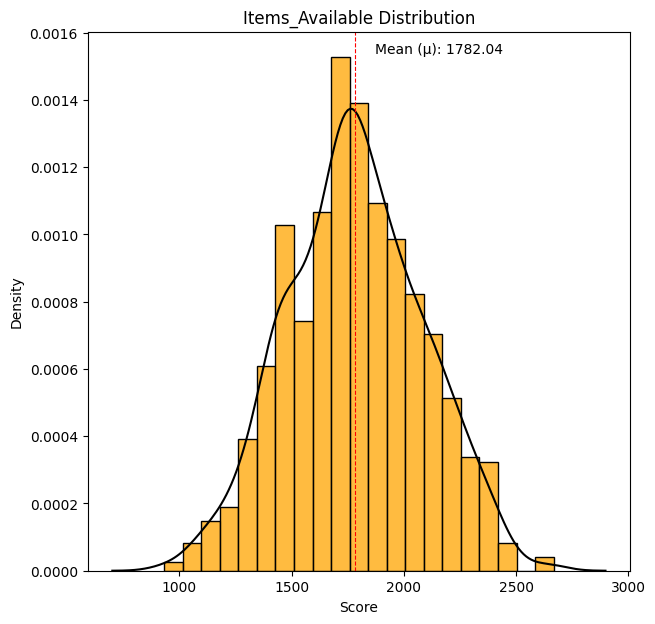

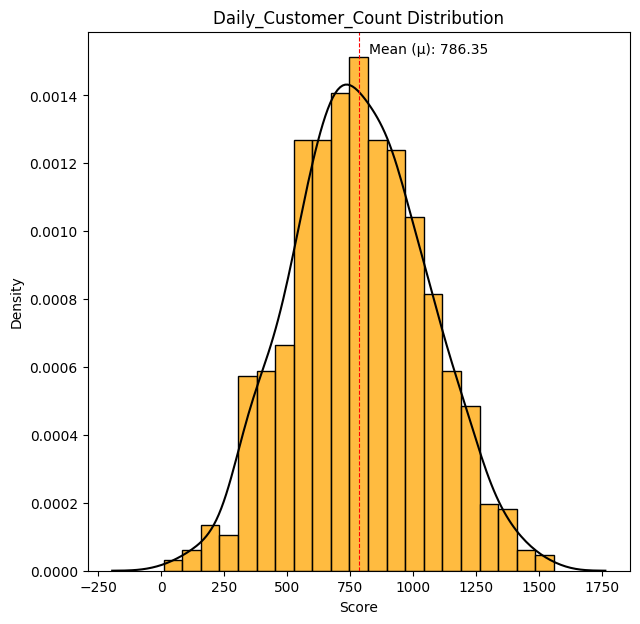

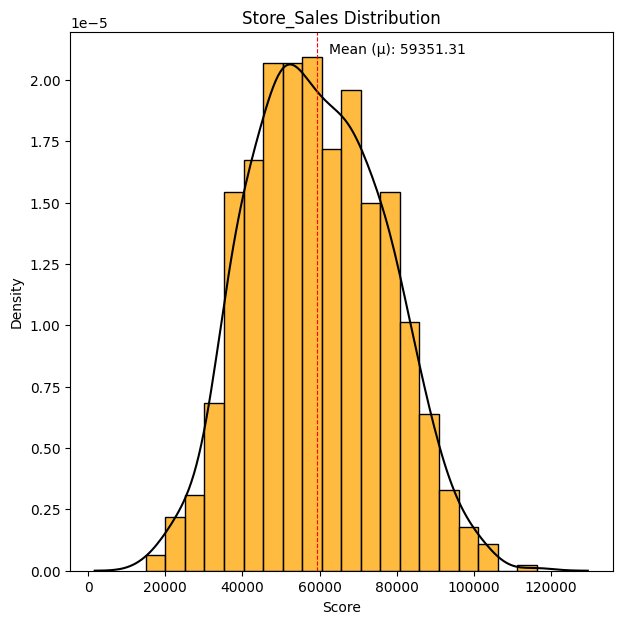

In [ ]:
for column_name in df.columns:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density',color='orange')
  sns.kdeplot(df[column_name], color='black')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

Normal distribution

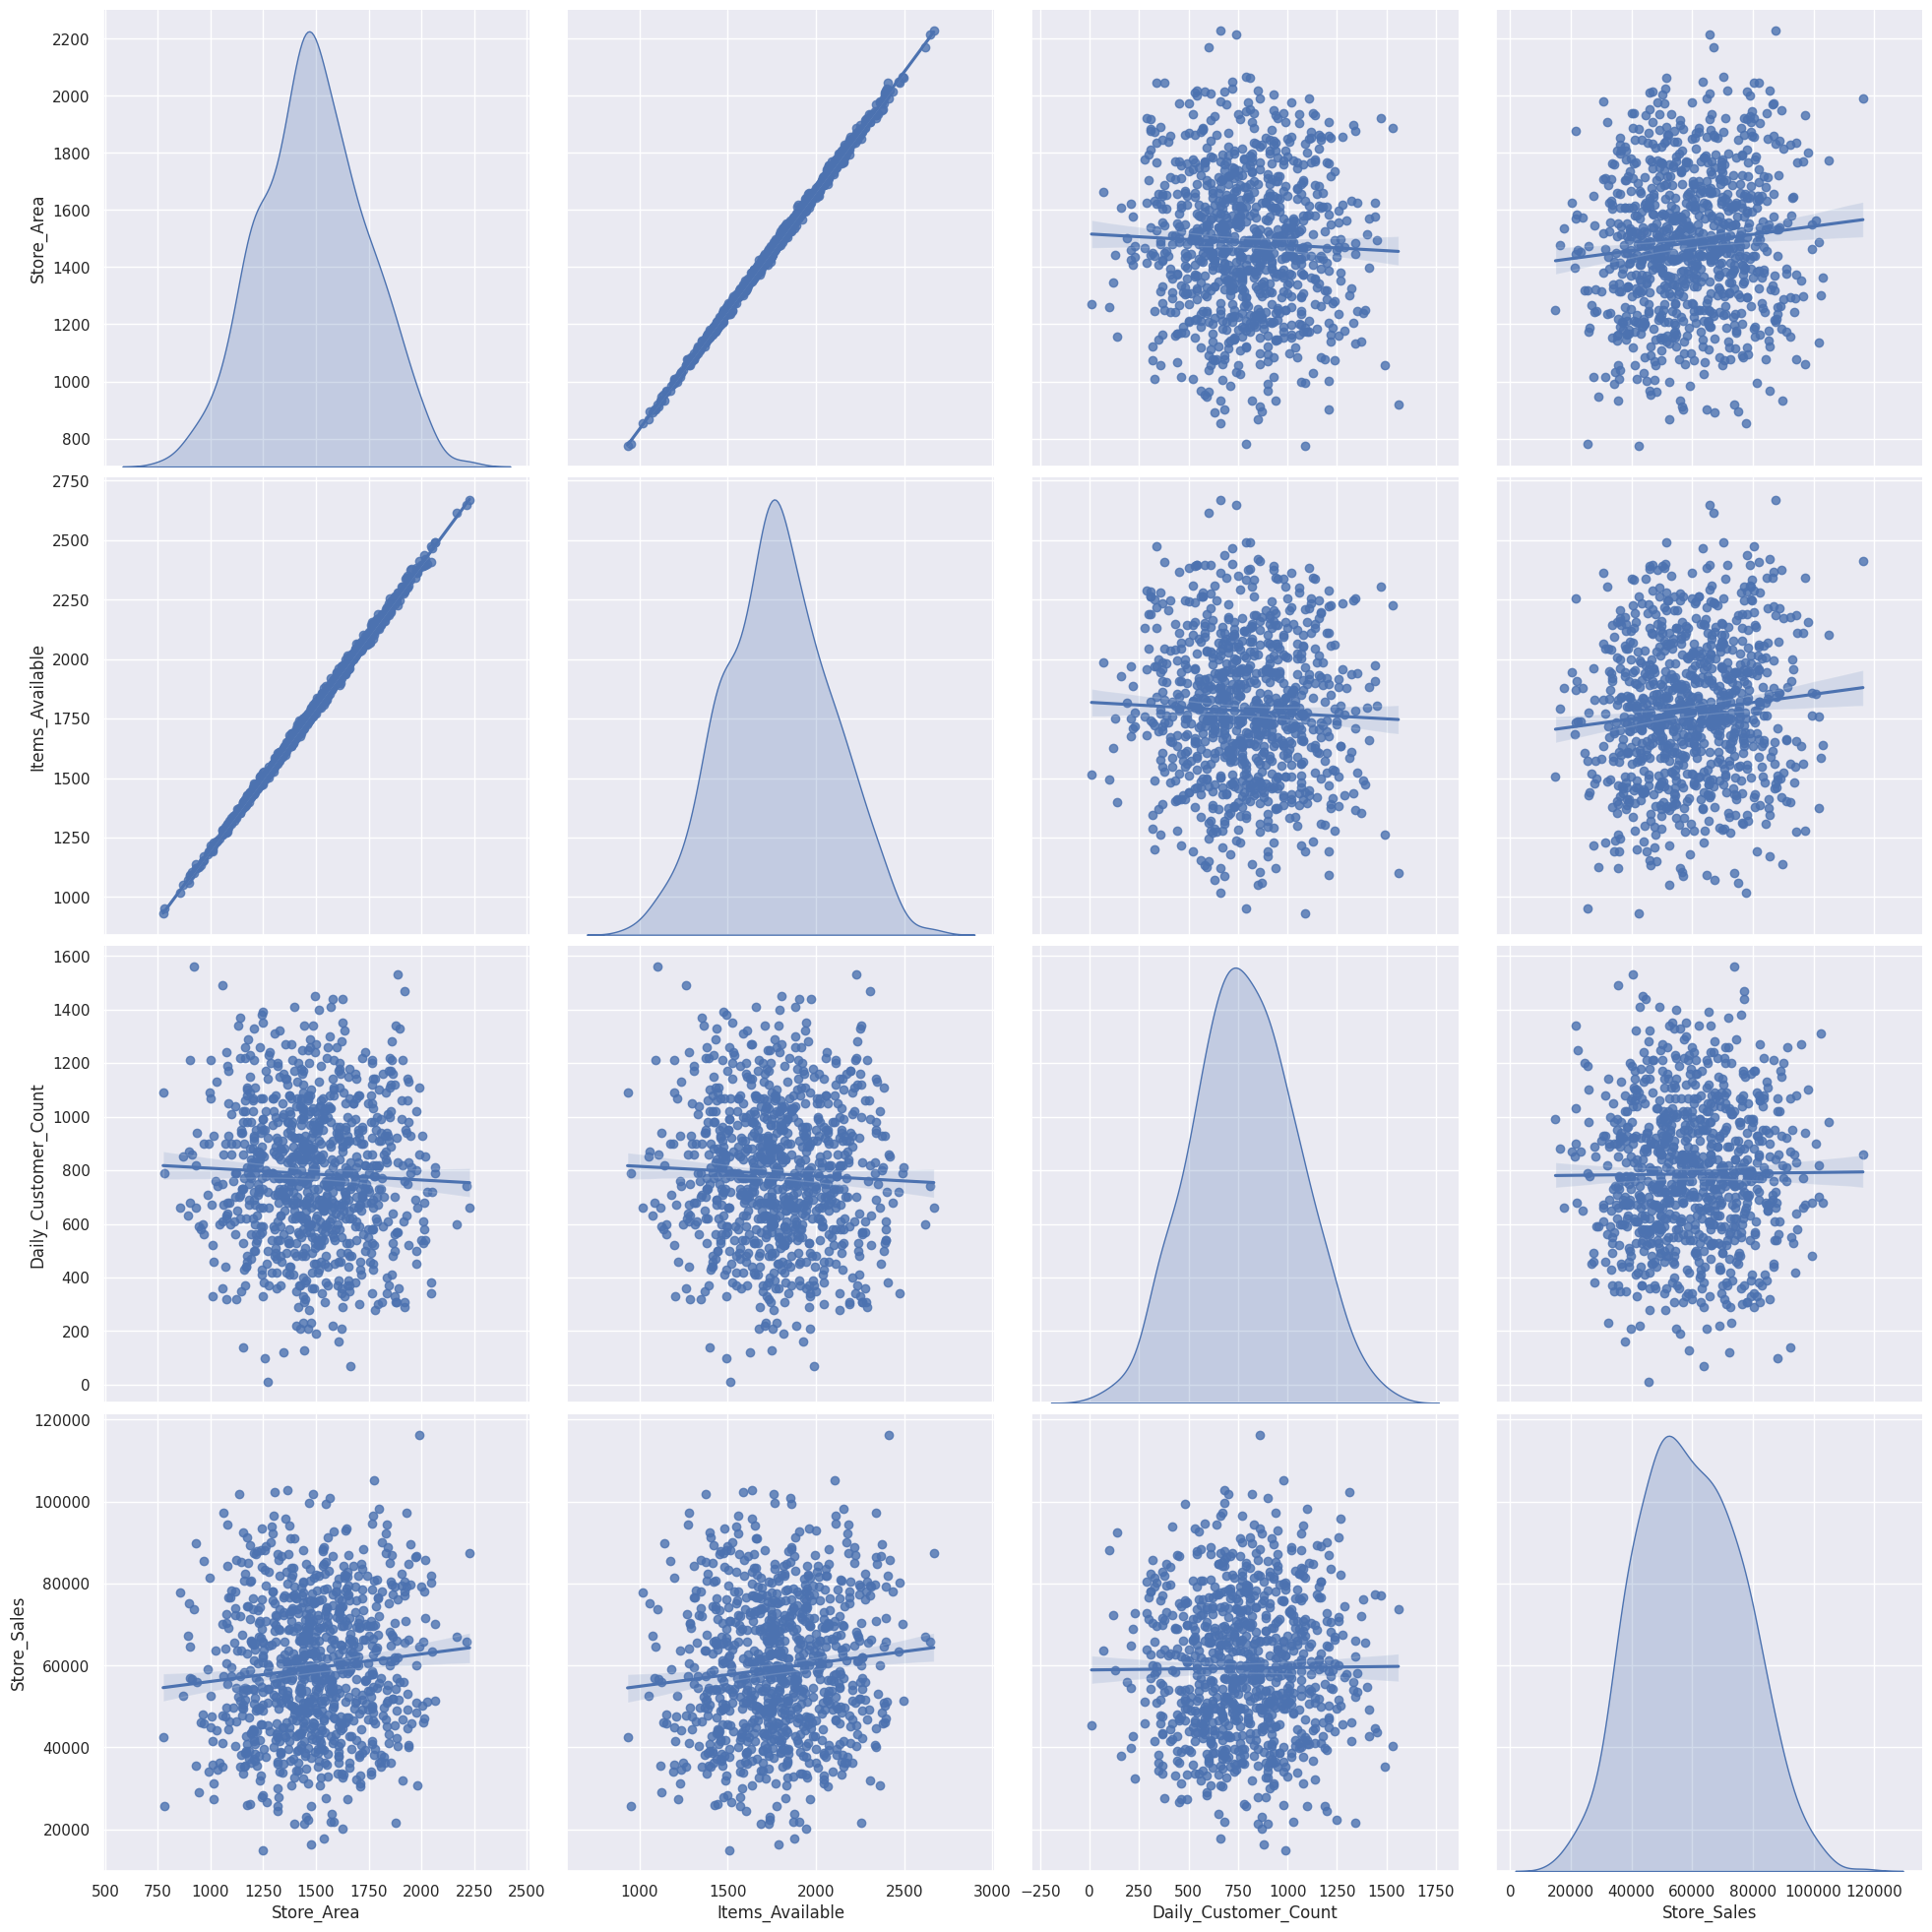

In [ ]:
sns.set()
sns.pairplot(df,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

Conclusions from the presented graphs: with the growth of the store area, the number of items sold increases. The obvious conclusion is that no one will use the area of ​​the store to accommodate fewer goods)

We are interested in the target indicator - the amount of money earned by the store. There is a slight correlation between store area (products sold) and the amount of money earned. The number of customers does not depend on revenue. For a more complete analysis of stores, there is not enough day of the week variable :)

Let's analyze the presence of outliers in the data. According to the unspoken rule, no more than 2% of the data should be deleted (no more than 20 lines of the dataset in this case).

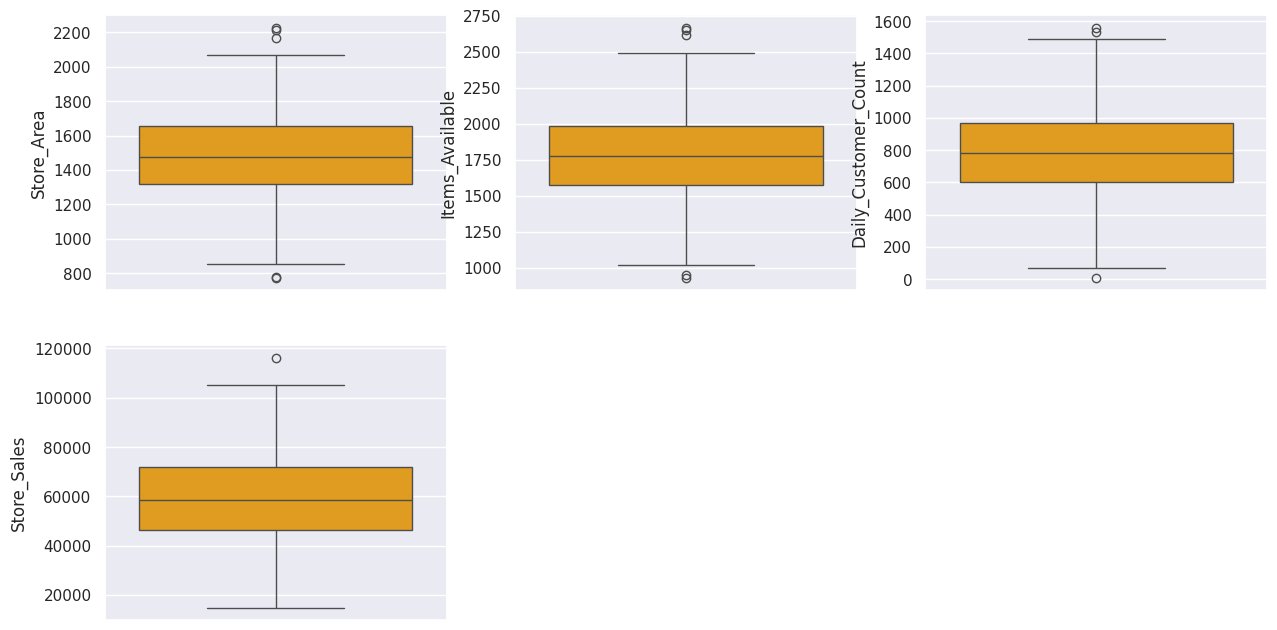

In [ ]:
i=1
plt.figure(figsize=(15,25))
for feature in df.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature],color='orange')
    i+=1

Minor outliers in the data

Correlation Analysis

In [ ]:
correlation = df.corr()
print(correlation['Store_Sales'].sort_values(ascending = False),'\n')

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64 



Index(['Store_Sales', 'Items_Available', 'Store_Area', 'Daily_Customer_Count'], dtype='object')


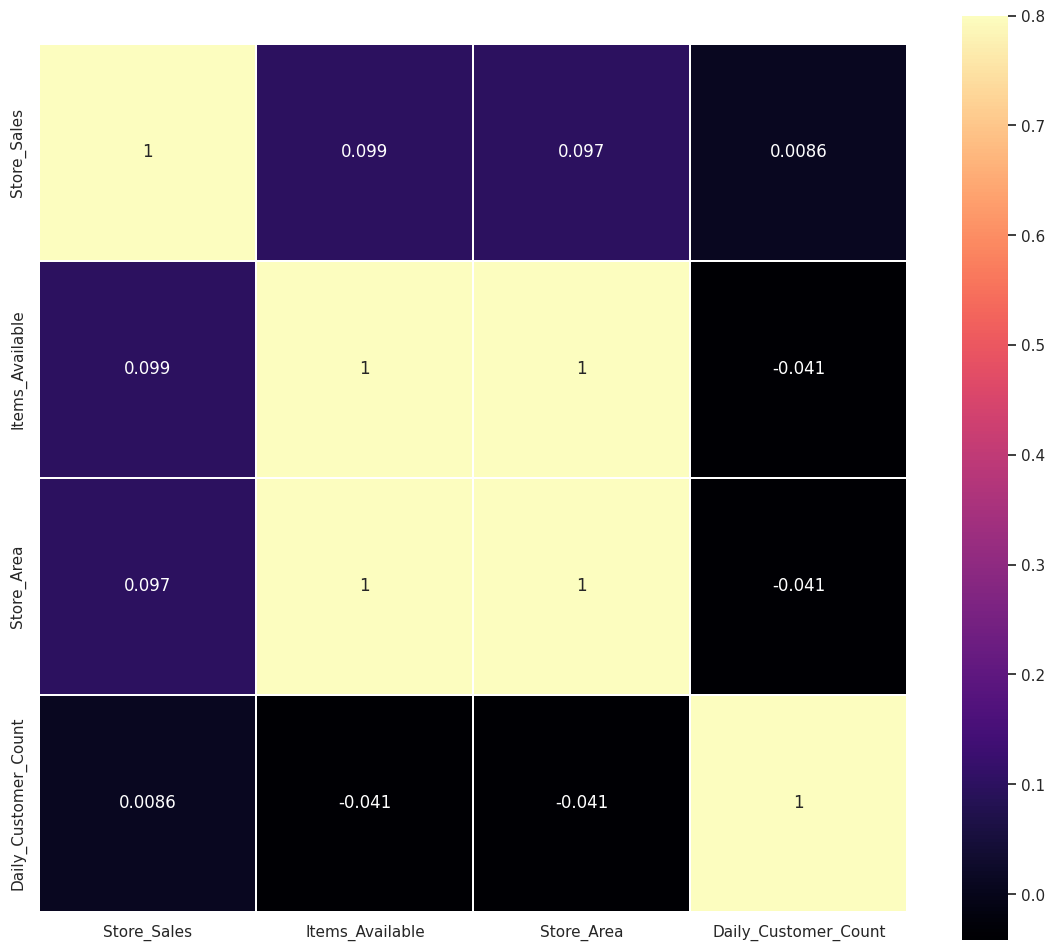

In [ ]:
k= 10
cols = correlation.nlargest(k,'Store_Sales')['Store_Sales'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='magma',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

Cluster Analysis

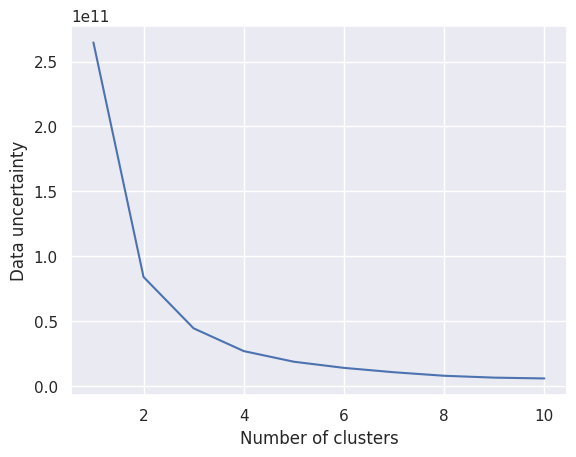

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

The optimal number of clusters is 4

Preprocess dat & ML

Clean the data from outliers with the condition of removing no more than 2% of the data volume.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(df)
df['Out']=y_pred
Out=df[df['Out']!=1]
Out.shape

(23, 5)

In [ ]:
df2=df[df['Out']==1]

df2

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Out
0,1659,1961,530,66490,1
1,1461,1752,210,39820,1
2,1340,1609,720,54010,1
3,1451,1748,620,53730,1
4,1770,2111,450,46620,1
...,...,...,...,...,...
891,1582,1910,1080,66390,1
892,1387,1663,850,82080,1
893,1200,1436,1060,76440,1
894,1299,1560,770,96610,1


Cleaning of data from outliers is done.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y=df2['Store_Sales']
X=df2.drop(['Store_Sales','Out'],axis=1)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print('-'*30, '\n')

model: RandomForestRegressor()
RMSE: 373191456.9286858
MAE: 15510.46057142857
------------------------------ 

model: LinearRegression()
RMSE: 293348248.26474077
MAE: 14254.975709527916
------------------------------ 

model: ElasticNet()
RMSE: 293316510.0964376
MAE: 14254.431453365334
------------------------------ 

model: KNeighborsRegressor()
RMSE: 370509205.8742857
MAE: 15668.262857142858
------------------------------ 



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.836e+10, tolerance: 1.993e+07
  model = cd_fast.enet_coordinate_descent(


model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
RMSE: 473519264.0
MAE: 17864.640625
------------------------------ 



## Analysis and Findings

Store Format and Target Audience:
* Discounters: Shoppers here are all about getting the best deal. They’re willing to trade fancy service for lower prices. To grow sales, the focus is on encouraging bigger purchases—think bulk buys and competitive pricing that keeps them coming back.

* Supermarkets/Convenience Stores: These customers care about convenience and a smooth shopping experience. To boost sales, it’s all about making their trips faster, easier, and more enjoyable—whether that’s shorter wait times or a more pleasant store environment.

What Drives Sales Growth?
* Keeping Products in Stock: Nothing kills sales faster than empty shelves. Making sure popular items are always available is a must.

* Tapping into Impulse Buys: Small, tempting items like snacks, toys, or seasonal goods placed along the customer’s path can work wonders. It’s amazing how much those little extras can add to the average bill.

* Quality and Presentation: A clean, well-lit, and inviting store makes people want to stay longer—and spend more. It’s all about creating an environment that feels good to shop in.

Promotions That Work:

* Volume Discounts: Deals like “Buy 1, Get 1 Free” or “Get an extra one for free” encourage shoppers to buy more than they originally planned.

* Bundling Products: Pairing related items (think “Buy a grill, get free firewood”) not only boosts sales but also makes the shopping experience feel more thoughtful and convenient.

Upselling Without the Pressure:

* Helping customers see the value in premium products is key. It’s not about pushing them to spend more—it’s about showing them why the upgrade is worth it.

Customer Retention vs. Acquisition:

* While bringing in new customers is important, keeping the ones you already have is often easier and more cost-effective. Loyalty programs, personalized offers, and a focus on great service can go a long way in making sure they stick around.

Recommendations

* Smart Product Placement:
Keep high-demand items fully stocked and easy to find.

* Use high-traffic spots like endcaps and checkout areas to showcase impulse buys—snacks, drinks, or small toys that catch the eye.

Make the Most of Impulse Purchases:

* Place tempting items like snacks, seasonal goods, or small treats near entrances, aisles, and exits. These little add-ons can really add up.

